# HW0x03 - ROMI SYSTEM MODELING & SIMULATION
**Name: Vinh Vo**

**Course: ME 405**

**Instructor: Charlie Refvem**

# ROMI MODEL

## Dynamics Analysis


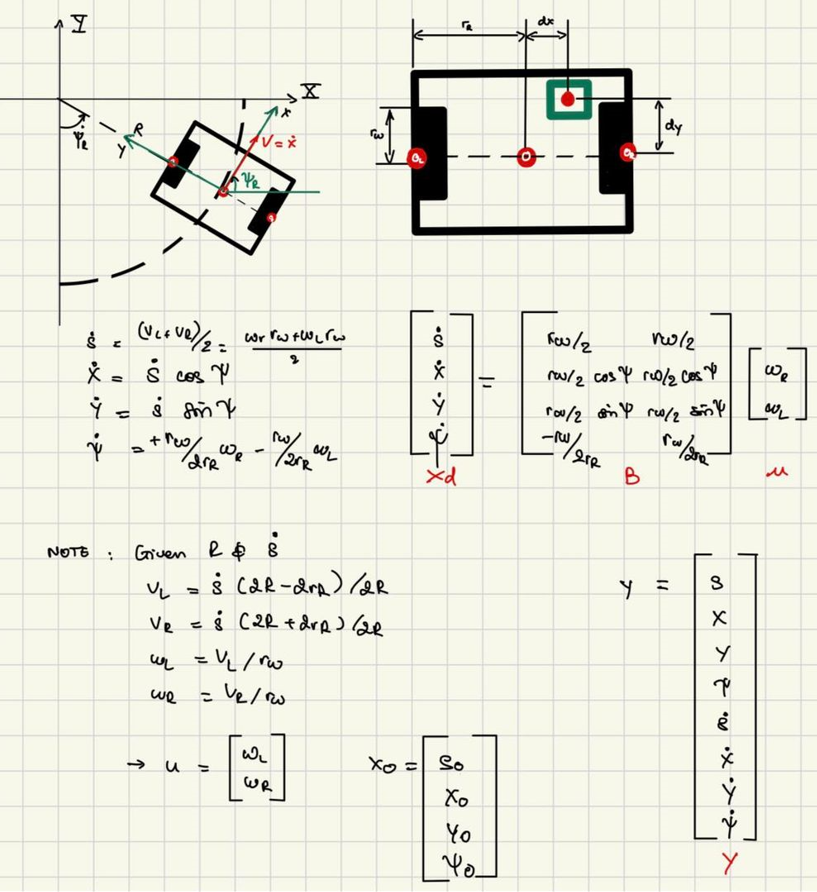

## Parameters Table

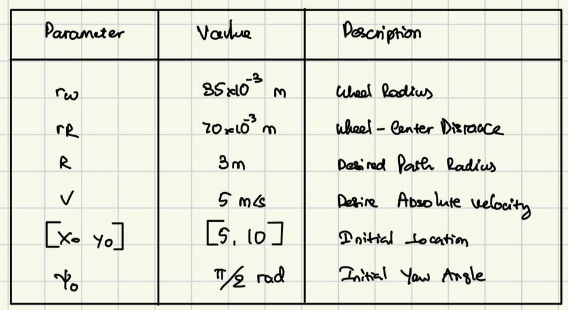

# Code 

In [1]:
from numpy import array, arange, zeros, transpose
from matplotlib import pyplot, rc
from math import pi, cos, sin

In [2]:
def system_eqn(t, x):
    rw = 35e-3    # [m]
    rR = 70e-3    # [m]
# -------------------------------------------------    
# Choose path base on wheel speed     
    if t >= 0 and t < 1:
        u = array([[10], [15]])
    elif t > 2 and t < 3:
        u = array([[20], [10]])
    elif t > 4 and t < 5:
        u = array([[20], [15]])
    elif t > 6 and t <= 7:
        u = array([[20], [5]])
    elif t > 7 and t <= 8:
        u = array([[15], [5]])
    elif t > 8 and t <= 9:
        u = array([[10], [20]])   
    elif t > 9 and t <= 10:
        u = array([[20], [5]])
    elif t > 10 and t <= 11:
        u = array([[5], [15]])
    elif t > 11 and t <= 12:
        u = array([[10], [10]])      
    elif t > 12 and t <= 13:
        u = array([[5], [25]])
    elif t > 13 and t <= 14:
        u = array([[15], [15]])
    elif t > 14 and t <= 15:
        u = array([[15], [20]])
    else:
        u = array([[5], [5]])
# -------------------------------------------------
# Choose path base on desired Radius and Speed
#     R_desired = 0.6 # <-----------------------------
#     V_desired = 0.25 # <-----------------------------
    
#     V_L = V_desired * (2*R_desired-2*rR)/(2*R_desired)
#     V_R = V_desired * (2*R_desired+2*rR)/(2*R_desired)
#     w_L = V_L / rw
#     w_R = V_R / rw
    
#     u = array([[w_L], [w_R]]) # [rad/s]
# # -------------------------------------------------
    B = array([ [rw/2,  rw/2],
                [rw/2 * cos(x[3]), rw/2 * cos(x[3])],
                [rw/2 * sin(x[3]), rw/2 * sin(x[3])],
                [-rw/(2*rR)     , rw/(2*rR)      ] ])  
    xd  =  B@u 
    y   = array([[ x[0]  ],
                 [ x[1]  ],
                 [ x[2]  ],
                 [ x[3]  ],
                 [ xd[0] ],
                 [ xd[1] ],
                 [ xd[2] ],
                 [ xd[3] ]])  
    
    return xd, y

SyntaxError: invalid syntax (1025457382.py, line 4)

In [ ]:
def Euler_solver(fcn, x_0, tspan, tstep):
    
    # Define a column of time values
    tout = arange(tspan[0], tspan[1]+tstep, tstep)

    # Preallocate an array of zeros to store state values
    xout = zeros([len(tout)+1,len(x_0)])
    
    # Determine the dimension of the output vector
    r = len(fcn(0,x_0)[1])
    
    # Preallocate an array of zeros to store output values
    yout = zeros([len(tout),r])

    # Initialize output array with intial state vector
    xout[0][:] = x_0.T

    # Iterate through the algorithm but stop one cycle early because
    # the algorithm predicts one cycle into the future
    for n in range(len(tout)):
        
        # Pull out a row from the solution array and transpose to get
        # the state vector as a column
        x = xout[[n]].T
        
        # Pull out the present value of time
        t = tout[n]
        
        # Evaluate the function handle at the present time with the
        # present value of the state vector to compute the derivative
        xd, y = fcn(t, x)
        
        # Apply the update rule for Euler's method. The derivative value
        # must be transposed back to a row here for the dimensions to line up.
        xout[n+1] = xout[n] + xd.T*tstep
        yout[n] = y.T
        
    return tout, xout[:-1], yout

In [ ]:
def RK4_solver(fcn, x_0, tspan, tstep):
    
    # Define a column of time values
    tout = arange(tspan[0], tspan[1]+tstep, tstep)

    # Preallocate an array of zeros to store state values
    xout = zeros([len(tout)+1,len(x_0)])
    
    # Determine the dimension of the output vector
    r = len(fcn(0,x_0)[1])
    
    # Preallocate an array of zeros to store output values
    yout = zeros([len(tout),r])

    # Initialize output array with intial state vector
    xout[0][:] = x_0.T

    # Iterate through the algorithm but stop one cycle early because
    # the algorithm predicts one cycle into the future
    for n in range(len(tout)):
        
        # Pull out a row from the solution array and transpose to get
        # the state vector as a column
        x = xout[[n]].T
        
        # Pull out the present value of time
        t = tout[n]
        
        # Evaluate the function handle at the present time with the
        # present value of the state vector to compute the derivative
        k1, _ = fcn(t, x)
        k2, _ = fcn(t + tstep/2, x + k1*tstep/2)
        k3, _ = fcn(t + tstep/2, x + k2*tstep/2)
        k4, y = fcn(t + tstep, x + k3*tstep)
        
        # Apply the update rule for RK4's method. The derivative value
        # must be transposed back to a row here for the dimensions to line up.
        xout[n+1] = xout[n] + (1/6)*tstep*(k1.T+2*k2.T+2*k3.T+k4.T)
        yout[n] = y.T
        
    return tout, xout[:-1], yout


# Results and Plots

In [ ]:
dt = 1e-3
tf = 15
tspan = [0, tf]

x_0 = array([ [0],
              [5],
              [10],
              [pi/2]])

tout_e, xout_e, yout_e = Euler_solver(system_eqn, x_0, tspan, dt)
tout_r, xout_r, yout_r = RK4_solver(system_eqn, x_0, tspan, dt)

ylab = ["Displacement [m]", "X_Location [m]", "Y_Location [m]", "Yaw_Angle [rad]", "Velocity [m/s]", "X_Velocity [m/s]", "Y_Velocity [m/s]", "Yaw_Rate [rad/s]"]
for i in range(8):
    rc('font', size=16)
    pyplot.figure(figsize=(12,3))
    pyplot.plot(tout_e, yout_e[:,i], 'g--', label='Euler Solver')
    pyplot.plot(tout_r, yout_r[:,i], 'k--', label='RK4 Solver') 
    pyplot.xlabel("Time [s]")
    pyplot.ylabel(ylab[i])
    pyplot.grid()
    pyplot.title(f"{ylab[i]} Vs Time [s]")
    pyplot.legend()
    pyplot.show()

# Path & Location Plot

In [ ]:
n = 500
yout_quilver = yout_r[::n, :]
pyplot.figure(figsize=(10, 10))
pyplot.plot(yout_e[:, 1], yout_e[:, 2], 'g--', label='Euler Solver')
pyplot.plot(yout_r[:, 1], yout_r[:, 2], 'k--', label='RK4 Solver')
pyplot.quiver(yout_quilver[:, 1], yout_quilver[:, 2], yout_quilver[:, 5], yout_quilver[:, 6], scale=100)
pyplot.plot(x_0[1], x_0[2],'rs', markersize = 20, label = 'Starting Location')
pyplot.xlabel("X-Coordinate [m]")
pyplot.ylabel("Y-Coordinate [m]")
pyplot.title("ROMI's Path")
pyplot.grid()
pyplot.axis('equal')
pyplot.legend() 
pyplot.show()

# Discussion Question

**Q1:
Explore the validity of the no-slip assumption and any other assumptions required for the
kinematic model in favor of a full dynamic model. Consider things like how the motors
may or may not easily integrate with the model, how the mass and friction properties of
the system may influence the model, and any other effects that may not match the idealized
nature of the kinematic model. Is the kinematic model good enough for our purposes?**

A1:
In this assignment, several assumptions are made, including no wheel slip, consistently accurate wheel velocity (assuming a perfect controller), and potentially omitting DC motor simulation and wheel inertia. Additionally, it's assumed that the Romi robot remains perfectly horizontal without tilting, meaning both roll and pitch rates are zero. However, in real-time scenarios, the robot may encounter bumps and exhibit imbalances between the wheels due to varying road conditions.
    
**Q2:
One of the problems with models like this is that significant deviation or drift will occur
between the simulation and the behavior of the real vehicle, especially when accumulated
over a long simulation. The concept of dead reckoning is that we can predict the position of
a system simply by integrating its velocity or acceleration over time. Naturally, small devi-
ations, like those caused by minor wheel slip, add up over time. A small error in velocity,
once integrated over time to produce position, can lead to wildly inaccurate estimations of
position.
How can we correct for this drift error? What other information would help us keep our
simulated model tracking with reality? Hint: consider what kind of sensors may be added
to the robot to measure the value of your selected state variables.**

A2:
To effectively minimize drift errors in the Romi simulation, using an Inertial Measurement Unit (IMU) is ideal. This allows for precise tracking of Euler angles, angular velocities, and linear velocities across all axes. By integrating this data into a feedback loop, along with a robust PID controller, we can significantly improve accuracy. 


**Q3:
While this is not a controls course, you will need to implement some kind of controller on
your robot to complete the term project. For this question, investigate ways in which you
may incorporate feedback into your system to make the robot move in ways that will be
advantageous for the term project. Address nuances such as:
• What sensor inputs will be useful for feedback.
• How you might split up a complicated path into segments such as straight lines, circu-
lar arcs, in-place turns, etc.**

A3:
As mentioned in Q2 and in line with our work in lab 0x05, the chosen sensor for improving accuracy is an IMU. This sensor is crucial for providing feedback on linear velocities along two axes (x and y) and the yaw rate, which are essential for fine-tuning the ROMI's movement. Moreover, the IMU's ability to measure the linear velocity along the z-axis and detect roll and pitch angular velocities from the gyroscope is valuable for identifying any unusual movements like bumps, flips, or tilts.

For efficient navigation, we'll segment the ROMI's path based on its absolute velocity and yaw rate while turning. This segmentation is important for adapting to the ROMI's speed and directional changes. Additionally, the frequency of the feedback loops is a critical factor to consider, as it impacts the responsiveness and accuracy of the ROMI's adjustments to its path.

**Q4:
Is it possible to determine the orientation and location of the robot after it has followed a
specific path simply by knowing the angle swept out by each wheel? If not, would it be
possible to know the orientation and location with a time-history of the angle swept out by
each wheel? If you know the robot’s orientation and location, can you figure out the angle
swept out by each wheel?
Investigate what information is required to track the robots absolute position in space, or
possible its position relative to particular maneuver, like a circular arc. What kind of data
will you need to track in your firmware to make use of this information?**

A4:
Yes, it is entirely possible to determine the orientation and location of the robot after it follows a specific path, provided that the initial position is known. Utilizing the data feedback from the IMU, it's possible to calculate various necessary values of the system at any given time. The required data includes all nine data from the accelerometer (3xyz), gyroscope(3xyz), and Euler angles(ypr). These feedbacks data set ensures precise tracking and calculation of the robot's movement and orientation.